# Unsupervised Movie Recomendation System

In [935]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [840]:
#I have two databases with movies and their rating and the ratings given by users
df_movies = pd.read_csv('/Users/maxmix/Downloads/ml-latest-small/movies.csv')
df_rating = pd.read_csv('/Users/maxmix/Downloads/ml-latest-small/ratings.csv')


In [841]:
#set the movieID as index
df_rating.set_index('movieId', inplace=True)

In [842]:
df_rating.head()
#(how can you not love Pandas...)

,userId,rating,timestamp
movieId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931


In [843]:
#set the movieID as index
df_movies.set_index('movieId', inplace=True)

In [844]:
df_movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [845]:
#by joining the two datasets on the movieID we obtain the DF we were looking for
df= df_rating.join(df_movies)
df

,userId,rating,timestamp,title,genres
movieId,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
193581,184,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,184,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,184,3.5,1537109805,Flint (2017),Drama


let's start with data engineering

I want to figure out the average rating for each movie and how many times it has been rated

In [846]:
#count rating for each movie
df_cluster=df.groupby('movieId').count()

In [847]:
#get the rating mean for each movie
df_cluster['rating_mean'] =df['rating'].groupby('movieId').mean()

In [848]:
#rename the variable
df_cluster['rating_count']=df_cluster['rating']

In [849]:
# drop the one I don't need
df_cluster.drop(['userId','userId','rating','timestamp','title','genres'],axis=1, inplace=True)

In [850]:
df_cluster

,rating_mean,rating_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [851]:
#let's add this two new variable to the primary df
df=df.join(df_cluster)


In [852]:
#I builded in some periodic saves to be able to revert if down the line i found some mistakes. Those are not necessary anymore, but i kept them, because honestly, they are super useful.
'''df=df_save_1.copy()'''

'df=df_save_1.copy()'

In [853]:
#first safe save
df_save_1=df.copy()
df_save_1

,userId,rating,timestamp,title,genres,rating_mean,rating_count
movieId,,,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
1,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
1,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
1,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
1,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
...,...,...,...,...,...,...,...
193581,184,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00000,1
193583,184,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50000,1
193585,184,3.5,1537109805,Flint (2017),Drama,3.50000,1


In [854]:
'''we have got all the info we needed from the movies. let' get the same (ie. average rating and rating count) for each user'''
#let's start by resetting the index ti usedID
df.reset_index(inplace=True)
df.set_index('userId', inplace=True)

In [855]:
df

,movieId,rating,timestamp,title,genres,rating_mean,rating_count
userId,,,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
...,...,...,...,...,...,...,...
184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00000,1
184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50000,1
184,193585,3.5,1537109805,Flint (2017),Drama,3.50000,1


In [856]:
#let's create two new df's: rating mean for each user and the std
df_user_m=df.groupby('userId').mean()
df_user_s=df.groupby('userId').std()


In [857]:
#rename the two variables
df_user_m['rating_mean_user']=df_user_m['rating']
df_user_m['rating_count_user']=df_user_m['rating_count']

In [858]:
#drop the rest
df_user_m.drop(['rating','timestamp','rating_mean','rating_count','movieId'],axis=1, inplace=True)

In [859]:
#et voila
df_user_m

,rating_mean_user,rating_count_user
userId,,
1,4.366379,70.241379
2,3.948276,69.517241
3,2.435897,30.871795
4,3.555556,54.467593
5,3.636364,124.000000
...,...,...
606,3.657399,32.207175
607,3.786096,74.834225
608,3.134176,52.239471


In [860]:
#rename the two variables
df_user_s['rating_std_user']=df_user_s['rating']
df_user_s['rating_std_mean_user']=df_user_s['rating_mean']

In [861]:
#drop the rest
df_user_s.drop(['rating','timestamp','rating_mean','rating_count','movieId'],axis=1, inplace=True)

In [862]:
#et voila 2.0
df_user_s

,rating_std_user,rating_std_mean_user
userId,,
1,0.800048,0.462704
2,0.805615,0.376516
3,2.090642,0.669606
4,1.314204,0.413369
5,0.990441,0.353763
...,...,...
606,0.724121,0.528305
607,0.965657,0.497922
608,1.079262,0.580937


In [863]:
#next checkpoint
#df= df_save_2.copy()

In [864]:
#save the df, for safety (checkpoint)
df_save_2=df.copy()
df_save_2

,movieId,rating,timestamp,title,genres,rating_mean,rating_count
userId,,,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,215
...,...,...,...,...,...,...,...
184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00000,1
184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50000,1
184,193585,3.5,1537109805,Flint (2017),Drama,3.50000,1


In [865]:
df_user_m.head()

,rating_mean_user,rating_count_user
userId,,
1,4.366379,70.241379
2,3.948276,69.517241
3,2.435897,30.871795
4,3.555556,54.467593
5,3.636364,124.000000


In [866]:
#join the new variables relative to the users mean behaviour
df= df.join(df_user_m, how='left'  )


In [867]:
#count the value for each movie
df.groupby('movieId').count()

,rating,timestamp,title,genres,rating_mean,rating_count,rating_mean_user,rating_count_user
movieId,,,,,,,,
1,215,215,215,215,215,215,215,215
2,110,110,110,110,110,110,110,110
3,52,52,52,52,52,52,52,52
4,7,7,7,7,7,7,7,7
5,49,49,49,49,49,49,49,49
...,...,...,...,...,...,...,...,...
193581,1,1,1,1,1,1,1,1
193583,1,1,1,1,1,1,1,1
193585,1,1,1,1,1,1,1,1


In [868]:
#join the new variables relative to the users std behaviour
df= df.join(df_user_s, how='left' )

In [869]:
#drop the variable I don't need
df.drop(['timestamp','title','genres'],axis=1, inplace=True)

In [870]:
#sort them ascending according to the movie ID. this step is quite important because the order will be kept throughout the whole analysis.
#the order will be used then in the next steps to identify the movies
df.sort_values('movieId', inplace= True)

In [871]:
#calculate the mean of all this variables for each movie
df=df.groupby('movieId').mean()

Disclaimer:
I have calculated the average rating behaviour of each user and merged it with the movie df. We are now aggregating the values for each movie. This means that we are aggregating the average user behaviour that rated each movie. This means for example that the average user of movieID 1 has given on average the vote 3.61 and rated 75 movies while the one from movieID 3 has given the vote 3.49 and voted 66 movies. We are capturing the user behaviour and gonna use this data to recommend movies. Rather than recommending movies that has a similar rating, we are going to recommend movies that have a similar rating given by similar users.


PCA

In [872]:
from sklearn.decomposition import PCA  


In [873]:
df.head()

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,rating_std_mean_user
movieId,,,,,,,
1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276
2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729
3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354
4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247
5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380


In [874]:
#an other checkpoint
df_save=df.copy()
df_save.head()

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,rating_std_mean_user
movieId,,,,,,,
1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276
2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729
3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354
4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247
5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380


In [875]:
#I am now going to standardize all the data to the std
df['rating']=(df['rating'].mean()-df['rating'])/(df['rating'].std())
df['rating_mean']=(df['rating_mean'].mean()-df['rating_mean'])/(df['rating_mean'].std())
df['rating_count']=(df['rating_count'].mean()-df['rating_count'])/(df['rating_count'].std())
df['rating_mean_user']=(df['rating_mean_user'].mean()-df['rating_mean_user'])/(df['rating_mean_user'].std())
df['rating_count_user']=(df['rating_count_user'].mean()-df['rating_count_user'])/(df['rating_count_user'].std())
df['rating_std_user']=(df['rating_std_user'].mean()-df['rating_std_user'])/(df['rating_std_user'].std())
df['rating_std_mean_user']=(df['rating_std_mean_user'].mean()-df['rating_std_mean_user'])/(df['rating_std_mean_user'].std())

In [876]:
df

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,rating_std_mean_user
movieId,,,,,,,
1,-0.756986,-0.756986,-9.134867,-0.609713,-2.290854,0.059267,1.027666
2,-0.194706,-0.194706,-4.447577,-0.235852,-1.972428,-0.004359,0.848017
3,0.003257,0.003257,-1.858407,-0.264352,-1.580026,-0.089360,0.655573
4,1.040732,1.040732,0.150431,-0.139843,-2.097169,-0.045943,1.071648
5,0.219595,0.219595,-1.724485,-0.565289,-2.031883,0.307935,1.070197
...,...,...,...,...,...,...,...
193581,-0.847884,-0.847884,0.418276,-0.901043,1.636934,-1.110170,-2.127839
193583,-0.273088,-0.273088,0.418276,-0.901043,1.636934,-1.110170,-2.127839
193585,-0.273088,-0.273088,0.418276,-0.901043,1.636934,-1.110170,-2.127839


In [877]:
#let's now plot the cumulative variance coverage by the different PCAs.
pca = PCA(n_components=7)  
pca.fit(df)         
Z = pca.transform(df)
Z.shape

(9724, 7)

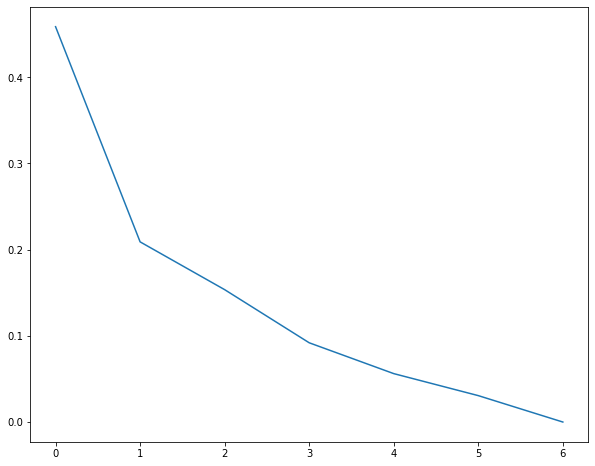

In [878]:
#I have 3 elbow points in the graph corresponding to 1,3 and 4 PCAs. since the difference between 1 and 3 os of 0.1% and the difference between 3 and 4 is very small. I decide to go with 3 PCAs to have more comparable result and mostly, to plot the clusters. 
# 1 PCA would have been a viable solution as well. 
plt.plot(pca.explained_variance_ratio_)

In [879]:
#let's calculate the matrix of the first 3 PCAs
pca = PCA(n_components=3)  
pca.fit(df)         
Z = pca.transform(df)
Z.shape

(9724, 3)

In [880]:
Z

array([[-3.94959518,  5.90366325,  3.20395695],
       [-2.14581182,  3.60282033,  1.44364266],
       [-1.23683512,  2.09118809,  0.5534508 ],
       ...,
       [ 1.15804893, -1.81001288,  1.2070383 ],
       [ 1.15804893, -1.81001288,  1.2070383 ],
       [-2.29665175,  0.83123028,  0.53673747]])

CLUSTER  ANALYSIS

In [881]:
from sklearn import cluster
import pylab as plt
import numpy as np
#set colors
colors = np.array(['red', 'blue', 'green', 'orange', 'black', 'yellow']*100)


In [882]:

# algorithm 1: KMeans
kmeans = cluster.MiniBatchKMeans(n_clusters=20)
kmeans.fit(Z)
clusters_k = kmeans.predict(Z)


In [883]:
#let's figure out the right amount of clusters to use (how many Ks)
inertia = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

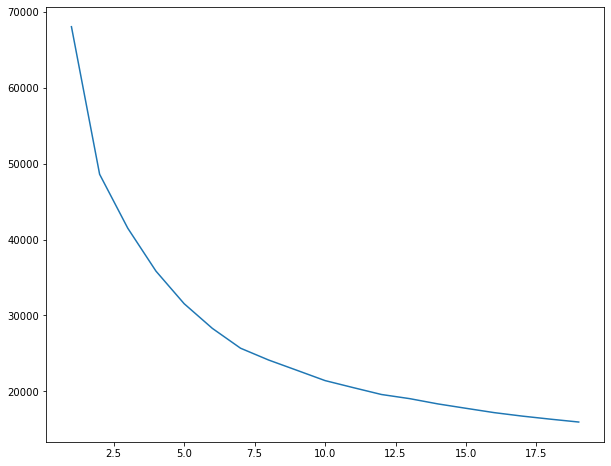

In [884]:
#from the plot you can tell tat the curve flattens out around 20. We could have taken more but since the calculation time with 20 was already quite high, and the marginal increase would have been minimal, for practical purposes I went with 20
plt.plot(range(1, 20), inertia)


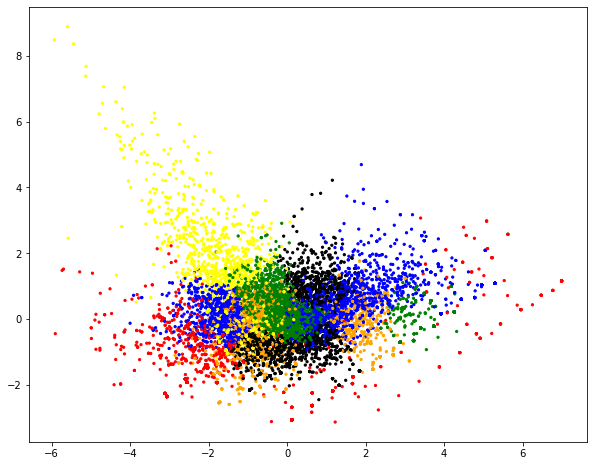

In [885]:

#let's plot out data in a PCA 1 vs PCA 2 scheme and color by cluster
plt.scatter(Z[:, 0], Z[:, 1], s=5, 
            color=colors[clusters_k])
plt.show()



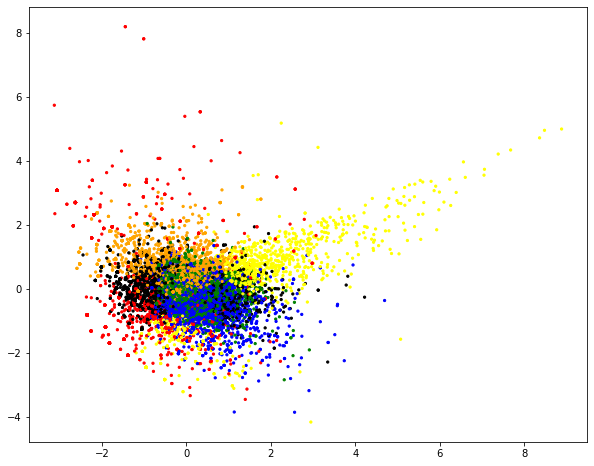

In [886]:
# plot the 2nd and 3rd PCA and color by custers
plt.scatter(Z[:, 1], Z[:, 2], s=5, 
            color=colors[clusters_k])
plt.show()

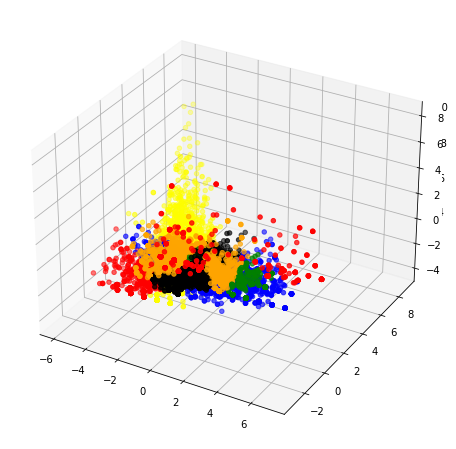

In [887]:
import numpy as np
import matplotlib.pyplot as plt

#let's plot the same thing in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(Z[:, 0], Z[:, 1],Z[:, 2],color=colors[clusters_k])

In [888]:
# algorithm 2: DBSCAN
#it's a density based clustering and delivers different results. It basically groups to get the points that are closest together and not closes to a prefixed one.
#now this part is rather tricky and a lot of trial and error was necessary. I set an Epsilon of 0.35 and min sample size of 30. Those two parameters will influence the clusters build. For my specific case I ended up with this two values giving me the most usable clustering
dbscan = cluster.DBSCAN(eps=0.35, min_samples=30)
dbscan.fit(Z)
clusters_db = dbscan.labels_.astype(np.int)


Short disclaimer: we have choses 3 PCA and therefor we have 3 dimensions. In the 3D plot you can see the shape of the data points. It is something close to a pyramid with an elongated tip. When we plot only 2 PCA, ie a 2D plot, we take a "section cut" of the dataset. The density based approach reveals that there is a core of movies with a similar user (vier) base, sharing the same behaviour, an upper layer of users with more similar behaviour and the rest is mostly outliers. Intuitively we could descrive it as 2 overlapping bells, one much denser and the second one rather disperse.


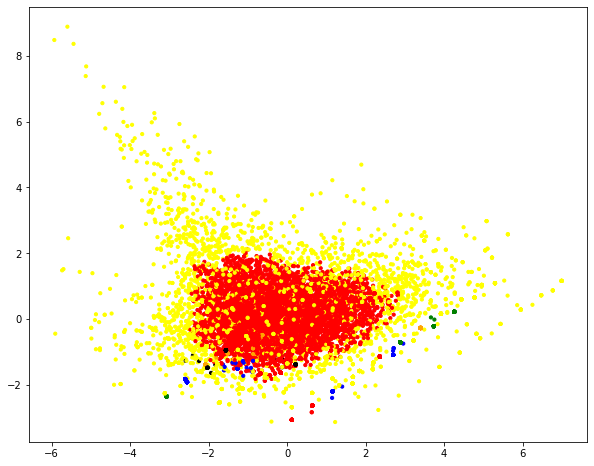

In [889]:

#let's plot PCA 1 against PCA 2
plt.scatter(Z[:, 0], Z[:, 1], s=10, 
            color=colors[clusters_db])
          
plt.show()

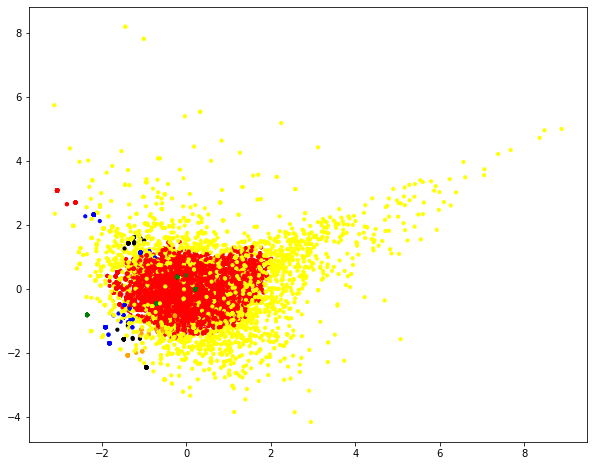

In [890]:
#let's plot PCA 2 against PCA 3
plt.scatter(Z[:, 1], Z[:, 2], s=10, 
            color=colors[clusters_db])            
plt.show()

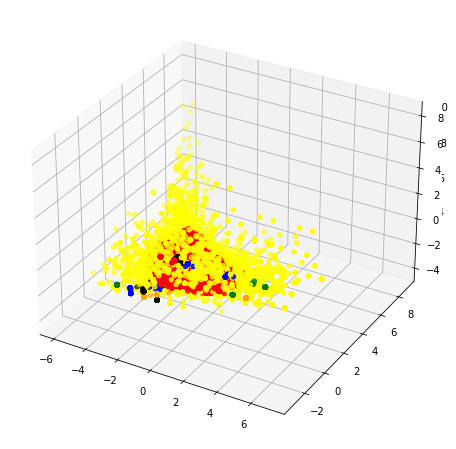

In [891]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#a 3D version of it
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(Z[:, 0], Z[:, 1],Z[:, 2],color=colors[clusters_db])




In [892]:
#now let's combine the classifications we just extracted with the previous dataset of the movies and associate to each movie it's cluster, PCA values etc...
pd_with_kcluster=pd.concat([df_save.reset_index(), pd.DataFrame(clusters_k)], axis=1)
pd_with_all_cluster=pd.concat([pd_with_kcluster.reset_index(drop=True), pd.DataFrame(clusters_db)], axis=1)
pd_for_selection=pd.concat([pd_with_all_cluster.reset_index(drop=True), pd.DataFrame(Z)], axis=1)

In [893]:
#rename the variables
pd_for_selection.columns.values[-6:]=['K_cluster','Density_cluster', 'PCA_1','PCA_2','PCA_3','PCA_4']

In [894]:
pd_for_selection

,movieId,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,PCA_2,PCA_3,PCA_4
0,1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276,5,-1,-3.949595,5.903663,3.203957
1,2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729,5,-1,-2.145812,3.602820,1.443643
2,3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354,11,-1,-1.236835,2.091188,0.553451
3,4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247,2,-1,-0.197829,2.201811,-0.878253
4,5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380,11,-1,-1.567856,2.486280,-0.067261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,193581,4.000000,4.000000,1.0,3.705224,22.216418,1.067660,0.763272,12,-1,0.639293,-2.245696,1.586084
9720,193583,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038
9721,193585,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038
9722,193587,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038


In [895]:
#I need a safe version copy of this dataset to replace the index later
pd_for_selection_original_index=pd_for_selection.copy()

In [896]:
pd_for_selection_original_index

,movieId,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,PCA_2,PCA_3,PCA_4
0,1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276,5,-1,-3.949595,5.903663,3.203957
1,2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729,5,-1,-2.145812,3.602820,1.443643
2,3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354,11,-1,-1.236835,2.091188,0.553451
3,4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247,2,-1,-0.197829,2.201811,-0.878253
4,5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380,11,-1,-1.567856,2.486280,-0.067261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,193581,4.000000,4.000000,1.0,3.705224,22.216418,1.067660,0.763272,12,-1,0.639293,-2.245696,1.586084
9720,193583,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038
9721,193585,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038
9722,193587,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038


In [897]:
#set index to movieID
pd_for_selection.set_index(['movieId'], inplace=True)

In [898]:
pd_for_selection

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,PCA_2,PCA_3,PCA_4
movieId,,,,,,,,,,,,
1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276,5,-1,-3.949595,5.903663,3.203957
2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729,5,-1,-2.145812,3.602820,1.443643
3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354,11,-1,-1.236835,2.091188,0.553451
4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247,2,-1,-0.197829,2.201811,-0.878253
5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380,11,-1,-1.567856,2.486280,-0.067261
...,...,...,...,...,...,...,...,...,...,...,...,...
193581,4.000000,4.000000,1.0,3.705224,22.216418,1.067660,0.763272,12,-1,0.639293,-2.245696,1.586084
193583,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038
193585,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,-1.810013,1.207038


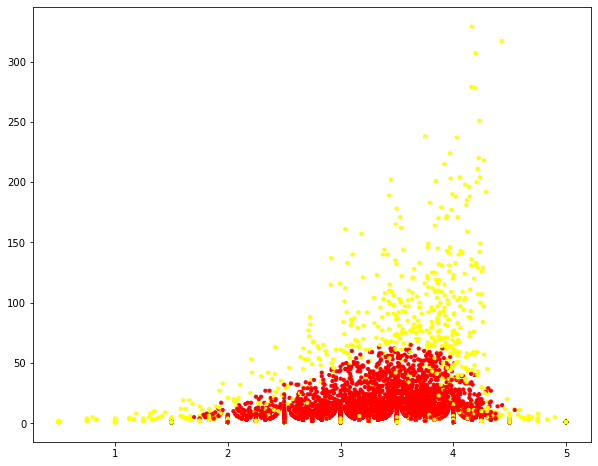

In [899]:
#let's plot the movies rating against their amount of voting and color it according to the K mean clusters
plt.scatter(pd_for_selection['rating_mean'], pd_for_selection['rating_count'], s=10, 
            color=colors[clusters_db])            
plt.show()

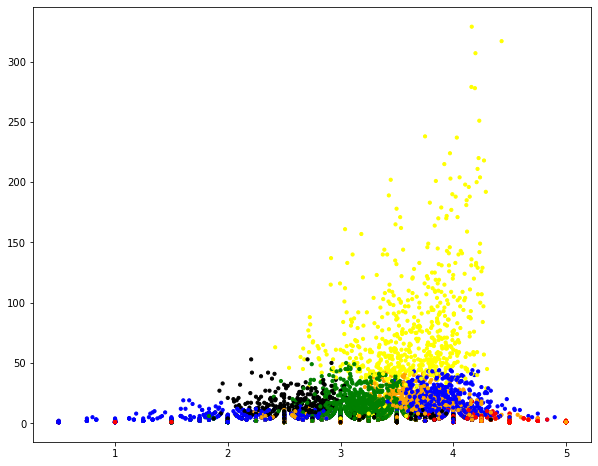

In [900]:
#let's plot the movies rating against their amount of voting and color it according to the K mean clusters
plt.scatter(pd_for_selection['rating_mean'], pd_for_selection['rating_count'], s=10, 
            color=colors[clusters_k])            
plt.show()

In [901]:
from sklearn.neighbors import NearestNeighbors
#next step is to get the 10 nearest points for each piont. That corrispons to the 10 nearest movies for each movie and the relative value
nn = NearestNeighbors(n_neighbors=10)
neigbors = nn.fit(Z)
distances, indices = neigbors.kneighbors(Z)

In [902]:
#the list of distances
distances


array([[0.        , 0.18730949, 0.29965853, ..., 0.637301  , 0.65710969,
        0.67136369],
       [0.        , 0.12089454, 0.24963787, ..., 0.54569738, 0.55827568,
        0.56287948],
       [0.        , 0.10116246, 0.11545556, ..., 0.25502811, 0.26091544,
        0.2767186 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.27382129,
        0.35830436],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27382129,
        0.35830436],
       [0.        , 0.16915589, 0.20645192, ..., 0.28858277, 0.29126207,
        0.29541462]])

In [903]:
#the corresponding index to the distances transformed into a pandas data frame
indices=pd.DataFrame(indices)
indices

,0,1,2,3,4,5,6,7,8,9
0,0,398,43,2144,46,897,123,506,899,3633
1,1,20,315,3814,35,116,3868,2013,472,1575
2,2,2775,3785,3282,4350,1622,118,5895,1480,4600
3,3,141,1171,543,2228,163,3385,598,200,19
4,4,333,274,6,140,239,203,44,9690,341
...,...,...,...,...,...,...,...,...,...,...
9719,9259,9487,9717,9439,9358,9155,9556,9716,9719,8720
9720,9721,9718,9714,9722,9267,9720,9340,9576,9635,8753
9721,9721,9718,9714,9722,9267,9720,9340,9576,9635,8753
9722,9721,9718,9714,9722,9267,9720,9340,9576,9635,8753


In [904]:
#now I am using the function replace to replace the index with the movieID
indices=indices.replace(pd_for_selection_original_index.index.tolist(), pd_for_selection_original_index['movieId'].tolist())


In [905]:
#adding an index from a previously saved dataset
indices

,0,1,2,3,4,5,6,7,8,9
0,1,457,47,2858,50,1196,150,588,1198,4993
1,2,21,357,5349,39,141,5445,2683,539,2115
2,3,3717,5299,4447,6373,2167,145,33679,2006,6863
3,4,169,1554,640,2965,193,4613,743,234,20
4,5,376,315,7,168,277,237,48,187541,384
...,...,...,...,...,...,...,...,...,...,...
9719,157369,170907,193573,168090,162968,148978,174479,193571,193581,127152
9720,193585,193579,193565,193587,158035,193583,161594,175585,180297,128852
9721,193585,193579,193565,193587,158035,193583,161594,175585,180297,128852
9722,193585,193579,193565,193587,158035,193583,161594,175585,180297,128852


In [906]:
#Next step is to add this values to the dataframe
pd_final=pd.concat([pd_for_selection.reset_index(), indices,   pd.DataFrame(distances)], axis=1)


In [907]:
pd_final

,movieId,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,...,0,1,2,3,4,5,6,7,8,9
0,1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276,5,-1,...,0.0,0.187309,0.299659,0.497968,0.506299,0.514870,0.578560,0.637301,0.657110,0.671364
1,2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729,5,-1,...,0.0,0.120895,0.249638,0.382640,0.439418,0.480170,0.515687,0.545697,0.558276,0.562879
2,3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354,11,-1,...,0.0,0.101162,0.115456,0.122474,0.244720,0.248799,0.249782,0.255028,0.260915,0.276719
3,4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247,2,-1,...,0.0,0.143295,0.557707,0.593711,0.642875,0.655108,0.660130,0.660271,0.661094,0.665364
4,5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380,11,-1,...,0.0,0.295574,0.349743,0.367455,0.437418,0.473826,0.482422,0.510611,0.511022,0.530187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,193581,4.000000,4.000000,1.0,3.705224,22.216418,1.067660,0.763272,12,-1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.548839
9720,193583,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273821,0.358304
9721,193585,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273821,0.358304
9722,193587,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273821,0.358304


In [908]:
#rename these new variables
pd_final.columns.values[-20:]=['movie_1','movie_2','movie_3','movie_4','movie_5','movie_6','movie_7','movie_8','movie_9','movie_10','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','distance_10']

In [909]:
#reset the index to movieID
pd_final.set_index('movieId', inplace=True)

In [910]:
pd_final

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,PCA_2,...,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10
movieId,,,,,,,,,,,,,,,,,,,,,
1,3.920930,3.920930,215.0,3.608763,75.817110,0.902720,0.474276,5,-1,-3.949595,...,0.0,0.187309,0.299659,0.497968,0.506299,0.514870,0.578560,0.637301,0.657110,0.671364
2,3.431818,3.431818,110.0,3.484976,71.471702,0.911694,0.490729,5,-1,-2.145812,...,0.0,0.120895,0.249638,0.382640,0.439418,0.480170,0.515687,0.545697,0.558276,0.562879
3,3.259615,3.259615,52.0,3.494413,66.116778,0.923683,0.508354,11,-1,-1.236835,...,0.0,0.101162,0.115456,0.122474,0.244720,0.248799,0.249782,0.255028,0.260915,0.276719
4,2.357143,2.357143,7.0,3.453187,73.173985,0.917559,0.470247,2,-1,-0.197829,...,0.0,0.143295,0.557707,0.593711,0.642875,0.655108,0.660130,0.660271,0.661094,0.665364
5,3.071429,3.071429,49.0,3.594055,72.283054,0.867648,0.470380,11,-1,-1.567856,...,0.0,0.295574,0.349743,0.367455,0.437418,0.473826,0.482422,0.510611,0.511022,0.530187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,4.000000,4.000000,1.0,3.705224,22.216418,1.067660,0.763272,12,-1,0.639293,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.548839
193583,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273821,0.358304
193585,3.500000,3.500000,1.0,3.705224,22.216418,1.067660,0.763272,4,-1,1.158049,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273821,0.358304


Let's find recommendations.
The user should insert 3 movies and the algorithm will get the movies closest recommended to the selected ones. I took tre randomly selected movies, with the ID 18,19,20 as my initial input. If more movies are located in the same cluster, that cluster has an increased importance. 


In [1040]:
#let's put in 3 of my favourite movies of all time: Neon Genesis Evangelion: The End of Evangelion (ID 84187), Fight Club (ID 2959)(ID 1256), Kill Bill Volume 1 from Tarantino (ID 6874)
pd_find_next_movie=pd_final.loc[27156:27156].append(pd_final.loc[2959:2959]).append(pd_final.loc[6874:6874])

In [1041]:
pd_find_next_movie

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,PCA_2,...,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10
movieId,,,,,,,,,,,,,,,,,,,,,
27156,4.300000,4.300000,5.0,3.045654,36.506471,0.948053,0.663031,3,-1,0.167659,...,0.0,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325
2959,4.272936,4.272936,218.0,3.688453,77.622247,0.893851,0.448642,5,-1,-4.630947,...,0.0,0.359602,0.451004,0.473897,0.603292,0.636584,0.706689,0.711931,0.729138,0.798719
6874,3.961832,3.961832,131.0,3.572957,68.754482,0.887951,0.470659,5,-1,-3.081927,...,0.0,0.161029,0.178115,0.214865,0.275369,0.281386,0.346815,0.384205,0.400708,0.411726


In [1042]:
#let's see to which cluster they are related
pd_find_next_movie[['K_cluster','Density_cluster']]

,K_cluster,Density_cluster
movieId,,
27156,0.663031,3
2959,0.448642,5
6874,0.470659,5


In [1043]:
#let's count the frequency of the cluster in the selected movies. In other words, let's see if one or more movies have the same cluster
list_of_density_clusters=[]
for cluster in pd_find_next_movie['Density_cluster']:
    list_of_clusster_repetition_value=[]
    reiteration_counter_1=0
    #let's check each cluster with the other clusters. let's take the first cluster and compare it to the next one. Append the result and start over with the next cluster
    while reiteration_counter_1< len(pd_find_next_movie['Density_cluster']):
        reiteration_counter_2=0
        #let's see if the cluster of one movie is the same of the others
        if np.array(cluster).round(6)==pd_find_next_movie['Density_cluster'].iloc[reiteration_counter_1].round(6):
            reiteration_counter_2+=1
        #let's append the result to the list
        list_of_clusster_repetition_value.append(reiteration_counter_2)
        reiteration_counter_1+=1
    list_of_density_clusters.append(sum(list_of_clusster_repetition_value))


In [1044]:
list_of_density_clusters

[1, 2, 2]

In [1045]:
#let's count the frequency of the cluster in the selected movies. In other words, let's see if one or more movies have the same cluster
list_of_K_clusters=[]
for cluster in pd_find_next_movie['K_cluster']:
    list_of_clusster_repetition_value=[]
    reiteration_counter_1=0
    #let's check each cluster with the other clusters. Let's take the first cluster and compare it to the next one. Append the result and start over with the next cluster
    while reiteration_counter_1< len(pd_find_next_movie['K_cluster']):
        reiteration_counter_2=0
        #let's see if the cluster of one movie is the same of the others
        if np.array(cluster).round(6)==pd_find_next_movie['K_cluster'].iloc[reiteration_counter_1].round(6):
            reiteration_counter_2+=1
        #let's append the result to the list
        list_of_clusster_repetition_value.append(reiteration_counter_2)
        reiteration_counter_1+=1
    list_of_K_clusters.append(sum(list_of_clusster_repetition_value))

In [1046]:
list_of_K_clusters

[1, 1, 1]

In [1047]:
'''I previously calculated to each point in the dataset the 10 closest ones. 
Following we calculated the occurrence of each cluster and are going to use that occurrence to recalculate the distance previously calculated.
The distance is going to be divided by the sum of occurrence of each cluster. for example, if a movie 1 is part of the same K mean cluster of movie 2 and part of the density cluster of movie 3, he is going to have value 2 for both clusters. Therefor the distances between the nearest points, ie the next 10 movie to recommend, is going to be divided by 2+2=4 instead of 1+1=2 (which is the standard division).'''
weighted_movie_1_distance=(pd_find_next_movie.iloc[0:1,-10:]/(list_of_K_clusters[0]+list_of_density_clusters[0]))
weighted_movie_2_distance=(pd_find_next_movie.iloc[1:2,-10:]/(list_of_K_clusters[1]+list_of_density_clusters[1]))
weighted_movie_3_distance=(pd_find_next_movie.iloc[2:3,-10:]/(list_of_K_clusters[2]+list_of_density_clusters[2]))

In [1048]:
pd_find_next_movie.iloc[0:1,-10:]

,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10
movieId,,,,,,,,,,
27156,0.0,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325,0.189325


In [1049]:
#let's associate the new distances to the movies. Those are the movies that the user set up initially. The 3 movies the algorithms uses to recommend new ones
new_distance=(weighted_movie_1_distance.append(weighted_movie_2_distance)).append(weighted_movie_3_distance)

In [1050]:
#and substiture them 
pd_find_next_movie_2=pd.concat([pd_find_next_movie.iloc[:,:-10], pd.DataFrame(new_distance)], axis=1)

In [1051]:
pd_find_next_movie_2

,rating,rating_mean,rating_count,rating_mean_user,rating_count_user,rating_std_user,K_cluster,Density_cluster,PCA_1,PCA_2,...,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10
movieId,,,,,,,,,,,,,,,,,,,,,
27156,4.300000,4.300000,5.0,3.045654,36.506471,0.948053,0.663031,3,-1,0.167659,...,0.0,0.094663,0.094663,0.094663,0.094663,0.094663,0.094663,0.094663,0.094663,0.094663
2959,4.272936,4.272936,218.0,3.688453,77.622247,0.893851,0.448642,5,-1,-4.630947,...,0.0,0.119867,0.150335,0.157966,0.201097,0.212195,0.235563,0.237310,0.243046,0.266240
6874,3.961832,3.961832,131.0,3.572957,68.754482,0.887951,0.470659,5,-1,-3.081927,...,0.0,0.053676,0.059372,0.071622,0.091790,0.093795,0.115605,0.128068,0.133569,0.137242


In [1052]:
#let's create a list with all movieIDs of all potentially recommended movies for all the three movies
recomendation_matrix_ID_1=pd.DataFrame(pd_find_next_movie_2.iloc[0,13:22])
recomendation_matrix_ID_1.columns = ['movieID']

recomendation_matrix_ID_2=pd.DataFrame(pd_find_next_movie_2.iloc[1,13:22])
recomendation_matrix_ID_2.columns = ['movieID']

recomendation_matrix_ID_3=pd.DataFrame(pd_find_next_movie_2.iloc[2,13:22])
recomendation_matrix_ID_3.columns = ['movieID']



In [1053]:
#let's make a list of all the movies
recomendation_matrix_ID=recomendation_matrix_ID_1.append(recomendation_matrix_ID_2.append(recomendation_matrix_ID_3))

In [1054]:
recomendation_matrix_ID

,movieID
movie_2,127390.0
movie_3,170357.0
movie_4,144606.0
movie_5,168632.0
movie_6,168144.0
movie_7,128097.0
movie_8,165843.0
movie_9,170399.0
movie_10,165483.0
movie_2,50.0


In [1055]:
#let's drop the old index and delete it
recomendation_matrix_ID.reset_index(inplace=True)
recomendation_matrix_ID.drop('index', axis=1, inplace=True)

In [1056]:
#same thing for the recommendations
recomendation_matrix_distance_1=pd.DataFrame(pd_find_next_movie_2.iloc[0,23:32])
recomendation_matrix_distance_1.columns = ['distance']

recomendation_matrix_distance_2=pd.DataFrame(pd_find_next_movie_2.iloc[1,23:32])
recomendation_matrix_distance_2.columns = ['distance']

recomendation_matrix_distance_3=pd.DataFrame(pd_find_next_movie_2.iloc[2,23:32])
recomendation_matrix_distance_3.columns = ['distance']


In [1057]:
#also those one in a list
recomendation_matrix_distance=recomendation_matrix_distance_1.append(recomendation_matrix_distance_2.append(recomendation_matrix_distance_3))

In [1058]:
#let's drop the old index and delete it
recomendation_matrix_distance.reset_index(inplace=True)
recomendation_matrix_distance.drop('index', axis=1, inplace=True)

In [1059]:
#let's merge the two lists
recomendation_matrix=recomendation_matrix_ID.join(recomendation_matrix_distance)
#and sort them by increasing distance ie. relevance of the recommendation
recomendation_matrix.sort_values(by=['distance'], inplace=True)

In [1060]:
recomendation_matrix

,movieID,distance
18,1200.0,0.053676
19,4886.0,0.059372
20,4995.0,0.071622
21,8961.0,0.091790
22,1240.0,0.093795
7,170399.0,0.094663
0,127390.0,0.094663
5,128097.0,0.094663
4,168144.0,0.094663
3,168632.0,0.094663


In [1061]:
#let's get the first recommendation and figure out the name.
df_movies.loc[int(recomendation_matrix['movieID'].tolist()[0])]

title                      Aliens (1986)
genres    Action|Adventure|Horror|Sci-Fi
Name: 1200, dtype: object

spot on!

In [1062]:
#let's get the second recommendation and figure out the name
df_movies.loc[int(recomendation_matrix['movieID'].tolist()[1])]

title                           Monsters, Inc. (2001)
genres    Adventure|Animation|Children|Comedy|Fantasy
Name: 4886, dtype: object

of course, easy win, one of the best movies ever made

In [1063]:
#let's get the third recommendation and figure out the name
df_movies.loc[int(recomendation_matrix['movieID'].tolist()[2])]

title     Beautiful Mind, A (2001)
genres               Drama|Romance
Name: 4995, dtype: object

In [1064]:
df_movies.loc[int(recomendation_matrix['movieID'].tolist()[3])]

title                        Incredibles, The (2004)
genres    Action|Adventure|Animation|Children|Comedy
Name: 8961, dtype: object

In [1065]:
df_movies.loc[int(recomendation_matrix['movieID'].tolist()[4])]

title     Terminator, The (1984)
genres    Action|Sci-Fi|Thriller
Name: 1240, dtype: object

I believe the movie recommender does perform the required task. The outcome is definitely promising and relevant. I have not been blown away by the results and believe that additional work would make it more solid. I would implement a voting system, so that the user would be able to feed movies and corresponding votes. In this scenario the 5 stars are implied. Also a more wide movie database would make the system more solid. 

Additionally some min-maxing with the clustering system could turn out to be beneficial. Generally i can't disagree with the movies recommended. I love the Terminator and Alien, but wouldn't say the Incredibles is a masterpiece. Probably by feeding the system more movies and corresponding rating, the algorithm would be definitely be able to deliver solid results. Last but not least, the genre and release year were not taken into consideration. The inclusion of movie specific elements could definitely help make the system more sound.

All in all i'm quite satisfied with the result and could definitely see it working for me. What also shocked me, is the realizatdion that I don't love any movie after 2010. Maybe I should start watching more movies... 